In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open("inventors_KR.txt", encoding = "utf8") as f:
    contents = f.readlines()

dataf = []

for x in range(len(contents)):
    contents[x] = contents[x].replace("\n","")
    contents[x] = contents[x].split(":")
    hold = contents[x][1].split(",")
    for name in hold:
        dataf += [[contents[x][0], name]]

In [4]:
df = pd.DataFrame(dataf)
df

,0,1
0,US6451348,정서영
1,US6451348,최귀원
2,US6451348,권익찬
3,US6451348,김용희
4,US6451348,최재봉
...,...,...
75105,US7501800,김대중
75106,US7604921,강윤호
75107,US7604921,김병주
75108,US7604921,김장섭


In [5]:
df1 = df.copy()

df1[1] = df[1].str[1:]

df1

,0,1
0,US6451348,서영
1,US6451348,귀원
2,US6451348,익찬
3,US6451348,용희
4,US6451348,재봉
...,...,...
75105,US7501800,대중
75106,US7604921,윤호
75107,US7604921,병주
75108,US7604921,장섭


In [6]:
gender1 = pd.read_csv("zhko.csv")
gender2 = pd.read_csv("zhko_with_weight.csv")

KOgender1 = gender1[gender1['langcode'] == "ko"]
KOgender2 = gender2[gender2['code'] == "KR"]

display(KOgender1)
display(KOgender2)

,name,langcode,gender
651903,가겸,ko,F
651904,가나,ko,F
651905,가란,ko,F
651906,가람휘,ko,F
651907,가랑,ko,F
...,...,...,...
657598,히나노,ko,F
657599,히요리,ko,F
657600,히카리,ko,F
657601,히토미,ko,F


,name,code,gender,wgt
1084581,가겸,KR,F,1.000000
1084582,가경,KR,F,0.951705
1084583,가경,KR,M,0.048295
1084584,가나,KR,F,1.000000
1084585,가란,KR,F,1.000000
...,...,...,...,...
1094258,히나노,KR,F,1.000000
1094259,히요리,KR,F,1.000000
1094260,히카리,KR,F,1.000000
1094261,히토미,KR,F,1.000000


In [7]:
# save df1.head(50000) as a csv file
# df1.head(50000).to_csv("KR_50k.csv", index = False)
df1 = df1.head(50000)

In [8]:
hold1 = []

for x in df1[1]:
    if x in set(KOgender1["name"]):
        row = KOgender1.loc[KOgender1['name']== x]
        hold1 += [row['gender'].values[0]]
    elif x in set(KOgender2["name"]):
        holdf = KOgender2[KOgender2['name']==x]
        weights = holdf["wgt"].values
        diff = np.abs(weights[0] - weights[1])
        if diff < 0.2:
            hold1 += ["Andy"]
        elif weights[0] > weights[1]:
            hold1 += ["F"]
        else:
            hold1 += ["M"]
    else:
        hold1 +=["Unknown"]

hold1

['F',
 'Unknown',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'M',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'M',
 'M',
 'Andy',
 'M',
 'M',
 'M',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'M',
 'F',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'M',
 'Unknown',
 'Unknown',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'M',
 'Unknown',
 'Unknown',
 'M',
 'M',
 'M',
 'M',
 'Unknown',
 'M',
 'M',
 'M',
 'M',
 'M',
 'Unknown',
 'M',
 'M',
 'Unknown',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'Unknown',
 'Unknown',
 'M',
 'F',
 'M',
 'Unknown',
 'F',
 'M',
 'M',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Andy',
 'M',
 'F',
 'F',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'M',
 'M',
 'M',
 'Andy',
 'M',
 'F',
 'M',
 'M',
 'M',
 'Unknown',
 'F',
 'M',
 'M',
 'Unknown',
 'Unknown',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'Unkno

In [9]:
# add hold1 as a column in df1
h1 = pd.Series(hold1)
df1['WGND'] = h1

df1.groupby('WGND').count()

/tmp/ipykernel_592764/3446333732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['WGND'] = h1


,0,1
WGND,,
Andy,734,734
F,3768,3768
M,33536,33536
Unknown,11962,11962


Text(0.5, 1.0, 'Korean Inventors Gender Distribution: Korean Characters')

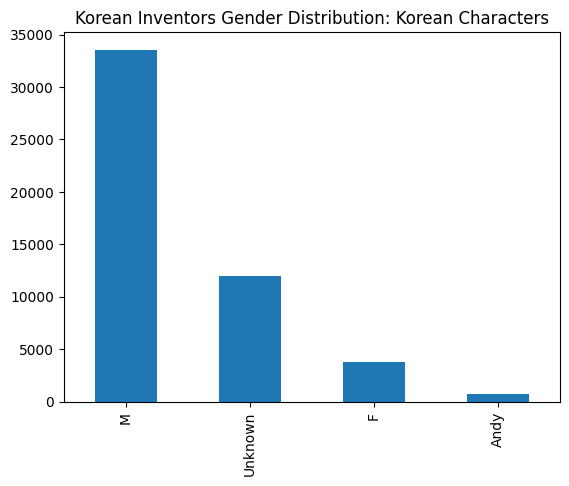

In [20]:
# graph df1 title is Korean Inventors Gender Distribution
df1['WGND'].value_counts().plot(kind='bar')
plt.title("Korean Inventors Gender Distribution: Korean Characters")

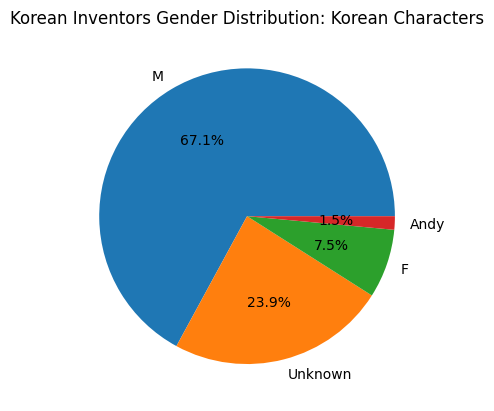

In [12]:
# do a pie chart
# df1['WGND'].value_counts().plot(kind='pie')
# show percentages
plt.pie(df1['WGND'].value_counts(), labels = df1['WGND'].value_counts().index, autopct='%1.1f%%')
plt.title("Korean Inventors Gender Distribution: Korean Characters")
plt.show()